In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
img_width, img_height = 512, 512
num_of_class = 2

sample_train = keras. utils.image_dataset_from_directory(
    directory='/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(img_width, img_height))

Found 624 files belonging to 2 classes.


In [ ]:
print(sample_train.class_names)

['NORMAL', 'PNEUMONIA']


In [ ]:
# Extracting Features and Labels
x = []
y = []

for feature, label in sample_train:
    x.append(feature.numpy())
    y.append(label.numpy())
print(y)
# Concatenate the lists to get the full 'x' and 'y' arrays
x = np.concatenate(x, axis=0)
y = np.concatenate(y, axis=0)

[array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32), array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1

In [ ]:
print("Shape of 'x_val':", x.shape)
print("Shape of 'y_val':", y.shape)

Shape of 'x_val': (624, 512, 512, 3)
Shape of 'y_val': (624, 2)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)
print(x_train.shape)
print(x_test.shape)

(436, 512, 512, 3)
(188, 512, 512, 3)


In [ ]:
x_train=x_train/255
x_test = x_test/255

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 8)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 256, 256, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 128, 128, 16)      0

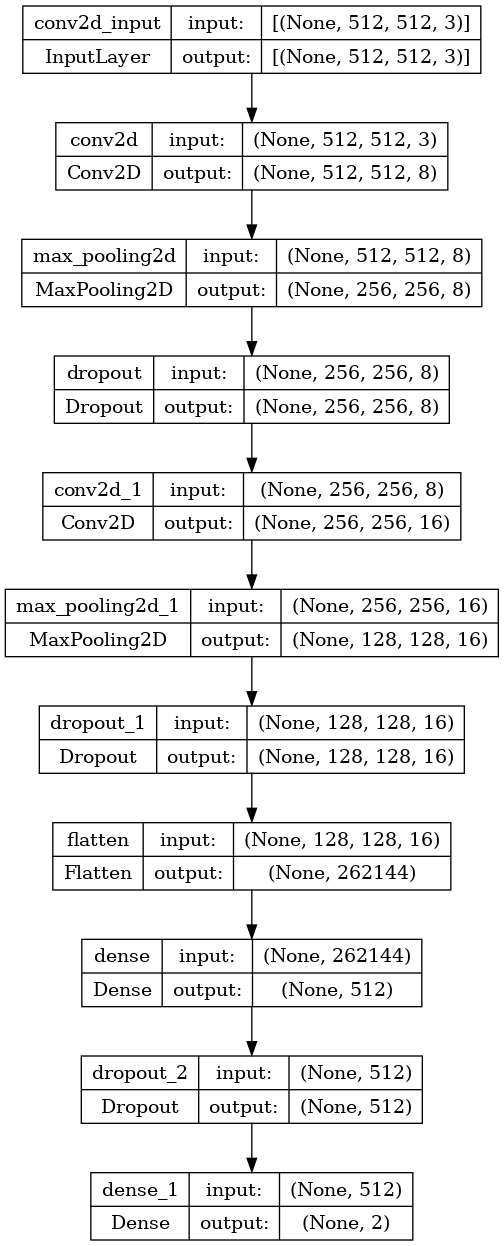

In [ ]:
# from keras.layers.pooling.max_pooling1d import MaxPool1D
from sklearn.metrics import confusion_matrix
import itertools
# from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation= 'relu', input_shape = (512,512,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

# Training The CNN
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()
epochs = 30
# Visualized Layers of CNN
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
hist = model.fit(x_train, y_train, epochs = epochs)

Epoch 1/30
14/14 [==============================] - 48s 3s/step - loss: 6.5493 - accuracy: 0.5665
Epoch 2/30
14/14 [==============================] - 47s 3s/step - loss: 0.6874 - accuracy: 0.7431
Epoch 3/30
14/14 [==============================] - 49s 3s/step - loss: 0.3581 - accuracy: 0.8578
Epoch 4/30
14/14 [==============================] - 48s 3s/step - loss: 0.2684 - accuracy: 0.8716
Epoch 5/30
14/14 [==============================] - 48s 3s/step - loss: 0.2215 - accuracy: 0.9083
Epoch 6/30
14/14 [==============================] - 49s 3s/step - loss: 0.1772 - accuracy: 0.9197
Epoch 7/30
14/14 [==============================] - 49s 3s/step - loss: 0.1230 - accuracy: 0.9427
Epoch 8/30
14/14 [==============================] - 49s 3s/step - loss: 0.1187 - accuracy: 0.9427
Epoch 9/30
14/14 [==============================] - 48s 3s/step - loss: 0.0729 - accuracy: 0.9771
Epoch 10/30
14/14 [==============================] - 48s 3s/step - loss: 0.0502 - accuracy: 0.9862
Epoch 11/30
14/14 [

In [ ]:
Y_pred = model.predict(x_test)

6/6 [==============================] - 5s 814ms/step


In [ ]:
print(Y_pred)

[[6.8087405e-01 3.1912604e-01]
 [7.5553888e-03 9.9244463e-01]
 [6.7726978e-07 9.9999923e-01]
 [8.6949360e-01 1.3050635e-01]
 [1.2405174e-07 9.9999982e-01]
 [8.4450141e-05 9.9991554e-01]
 [9.2763406e-01 7.2365880e-02]
 [1.6138776e-07 9.9999982e-01]
 [6.1360973e-01 3.8639030e-01]
 [9.9999982e-01 1.4465380e-07]
 [1.5574195e-05 9.9998432e-01]
 [2.0767578e-01 7.9232430e-01]
 [1.7921261e-07 9.9999970e-01]
 [9.9782687e-01 2.1731074e-03]
 [1.0405204e-05 9.9998957e-01]
 [1.7599166e-05 9.9998230e-01]
 [2.7298336e-05 9.9997264e-01]
 [7.6240070e-10 9.9999994e-01]
 [3.4933371e-06 9.9999648e-01]
 [9.9894518e-01 1.0548664e-03]
 [2.3535228e-11 9.9999994e-01]
 [8.3206955e-04 9.9916792e-01]
 [5.2562196e-08 9.9999994e-01]
 [9.9920028e-01 7.9968607e-04]
 [4.0897863e-08 9.9999994e-01]
 [9.7120494e-05 9.9990278e-01]
 [5.2848156e-13 9.9999994e-01]
 [2.9589760e-01 7.0410240e-01]
 [4.1083209e-04 9.9958915e-01]
 [2.1546711e-07 9.9999970e-01]
 [9.9710226e-01 2.8977036e-03]
 [5.6844833e-04 9.9943161e-01]
 [9.9942

In [ ]:
def func(data,threshold):
  for i in range(len(data)):
      for j in range(len(data[i])):
          if data[i][j] < threshold:
              data[i][j] = 0
          else:
              data[i][j] = 1
  return data

In [ ]:
Y_pred_01 = func(Y_pred,0.5)

In [ ]:
print(Y_pred_01)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [ ]:
Y_true = func(y_test,0.5)

In [ ]:
print(Y_true)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix

print(classification_report(Y_true,Y_pred_01))


              precision    recall  f1-score   support

           0       0.92      0.68      0.78        65
           1       0.85      0.97      0.90       123

   micro avg       0.87      0.87      0.87       188
   macro avg       0.88      0.82      0.84       188
weighted avg       0.87      0.87      0.86       188
 samples avg       0.87      0.87      0.87       188



In [ ]:
from sklearn.metrics import accuracy_score
print("\n Accuracy of the model: {0}%".format(accuracy_score(Y_true, Y_pred_01)*100))


 Accuracy of the model: 86.70212765957447%


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(Y_true, Y_pred_01))

[[[119   4]
  [ 21  44]]

 [[ 44  21]
  [  4 119]]]
